## 2020, Dec 17
# MALL CUSTOMER SEGMENTATION

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

After getting to know the data set quickly, ***Exploratory Data Analysis*** will be performed. We should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then we will spesify the different variables to use for cluster analysis.

Finally, we will cluster customers using the ***K-Means Clustering*** method, after that label the clusters.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#overview_of_the_Analyse">Overview of the Analyse</a></li>
        <li><a href="#import_libraries,load_dataset,exploring_data">Import Libraries, Load Dataset, Exploring Data</a></li>
        <li><a href="#exploratory_data_analysis_(EDA)">Exploratory Data Analysis (EDA)</a></li>
        <li><a href="#cluster_analysis">Cluster Analysis</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>


<h2 id="Overview of the Analyse">1. Overview of the Analyse</h2>


#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

<h2 id="import_libraries,load_dataset,exploring_data">2. Import Libraries, Load Dataset, Exploring Data</h2>

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This dataset is composed by the following five features:

**CustomerID:** Unique ID assigned to the customer

**Gender:** Gender of the customer

**Age:** Age of the customer

**Annual Income (k$):** Annual Income of the customer

**Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending nature.


#### Explore Data


In [3]:
df.shape

(200, 5)

In this particular dataset we have 200 samples to study.

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Some columns' names are quite complex, let's change their names.

In [5]:
df2 = df.rename({"CustomerID": 'ID', "Annual Income (k$)": "Annual Income","Spending Score (1-100)": "Spending Score"}, axis=1)

In [6]:
df2.head()

,ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Looking for null values
df2.isnull().sum()

ID                0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [8]:
#Checking datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#Replacing objects for numerical values
df2['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [10]:
df2.drop("ID", axis = 1, inplace = True)

In [11]:
df2.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<h2 id="exploratory_data_analysis_(EDA)">3. Exploratory Data Analysis (EDA)</h2>

After performing Cluster Analysis, we need to know the data well in order to label the observations correctly. We will analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. We will apply data visualization techniques. Observing breakpoints helps us to internalize the data.





0    112
1     88
Name: Gender, dtype: int64

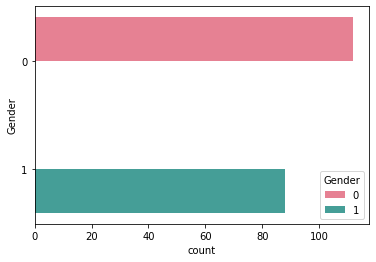

In [12]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df2, palette="husl", hue = "Gender")
df2["Gender"].value_counts()

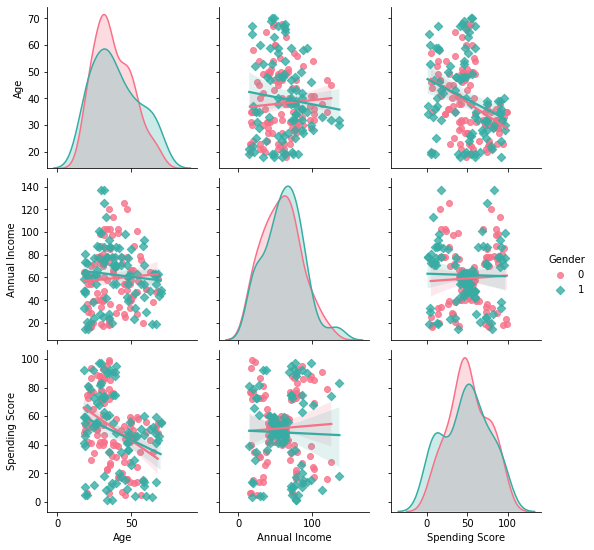

In [13]:
#Pairplot with variables we want to study
sns.pairplot(df2, vars=["Age", "Annual Income", "Spending Score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

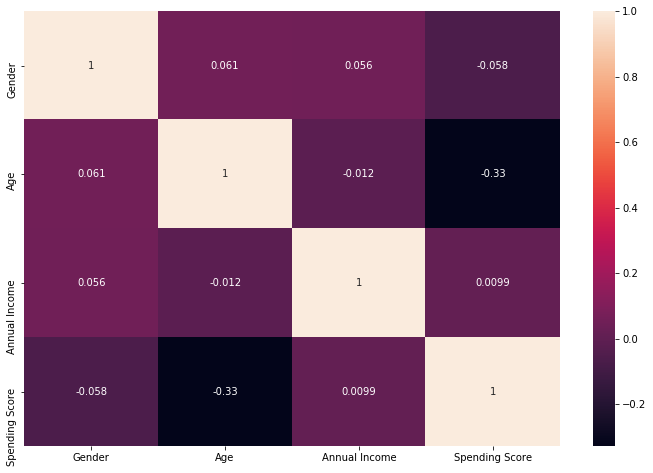

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df2.corr(),annot = True)

We will examine the relations between selected variables in order to have an insight.

To examine the relations we will use Seaborn’s lmplot. Seaborn’s lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables. Logistic regression for binary classification is also supported with lmplot.

**Age and Annual Income**

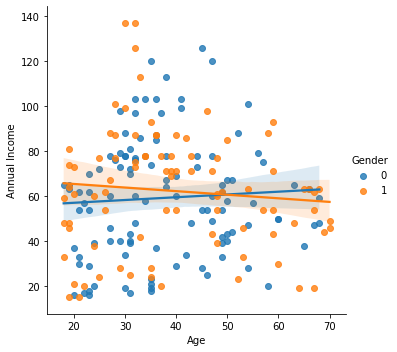

In [15]:
sns.lmplot(x = "Age", y = "Annual Income", data = df2, hue = "Gender")

In this graphic we can clearly see how people in their thirties, forties and fifthies tend to earn more money annually than the ones younger than thirty or older than fifty years old. That is to say people whose age lays between thirty and fifty years old seem to get better jobs since they might be better prepared or be already more experienced than younglings or older people. In the graphic we can also see how males tend to earn a little bit more money than females, at least until fifty years old.

**Spending Score and Annual Income**

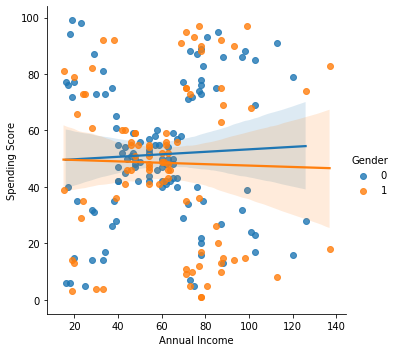

In [16]:
sns.lmplot(x = "Annual Income", y = "Spending Score", data = df2, hue = "Gender")

Here we can observe how a better annual income leads to having a higher spending score, specially for women. However the correlation between these two variables isn't that big, we seem to find the majority of people in the middle, people who have decent salaries and have a reasonably high spending score.

**Age and Spending Score**

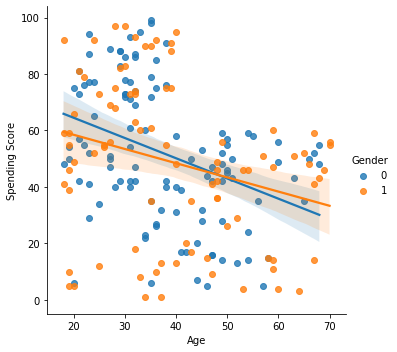

In [17]:
sns.lmplot(x = "Age", y = "Spending Score", data = df2, hue = "Gender")


In this last graphic we get to see something we could predict, young people tend to spend way more than older people. That can be due to many reasons: young people usually have more free time than old people, shopping malls tend to have shops that target young people such as videogames and tech stores, etc.

<h2 id="cluster_analysis">4. Cluster Analysis</h2>


Our main purpose here is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

We can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If we use a maximum of two variables for each cluster analysis, we can identify cluster labels more clearly.

First, the K-Means algorithm expects from us to determine the number of clusters (*n_clusters*). We can determine the optimal number of clusters for each cluster analysis in various ways. In this case, we will use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [18]:
#Creating values for the elbow
X = df2.loc[:,["Age", "Spending Score"]]
df_new = pd.DataFrame(X)
df_new.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

In [19]:
from sklearn.cluster import KMeans

In [20]:
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

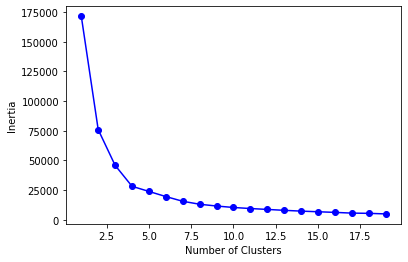

In [21]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k and one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. In this problem, we are using the inertia as cost function in order to identify the sum of squared distances of samples to the nearest cluster centre.

Looking at this particular example, if we imagine the line in the graphic is an arm, the elbow can be found, approximately, where the number of clusters is equal to 5. Therefore we are selecting 5 as the number of clusters to divide our data in.

In [22]:
from yellowbrick.cluster import KElbowVisualizer

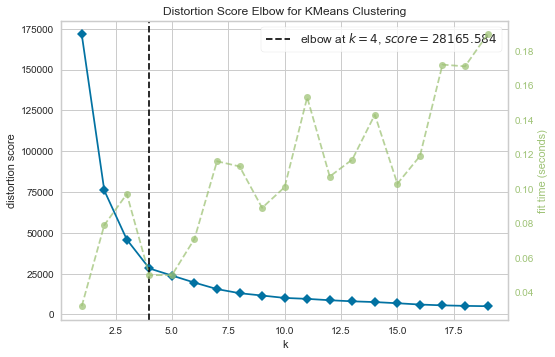

In [23]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,20))
visu.fit(X)
visu.show()

#### *iii. Apply K Means*

In [24]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(X)
labels = model.labels_
centroids = model.cluster_centers_

In [25]:
clusters = model.labels_

In [26]:
df_new["Predicted_clusters"] = clusters

In [27]:
df_new.head()

,Age,Spending Score,Predicted_clusters
0,19,39,3
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,4


#### *iv. Visualizing and Labeling All the Clusters*

In [28]:
from mpl_toolkits.mplot3d import Axes3D

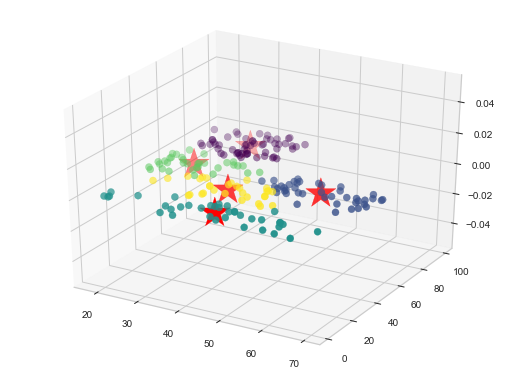

In [29]:
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_new.iloc[:,0],df_new.iloc[:,1],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centroids[:,0],centroids[:,1],c="red",marker="*",s = 1000);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [30]:
#Creating values for the elbow
X = df2.loc[:,["Annual Income", "Spending Score"]]
df_new = pd.DataFrame(X)
df_new.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

In [31]:
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

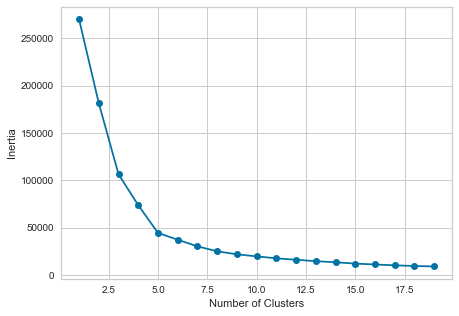

In [32]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#### *iii. Apply K Means*

In [33]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(X)
labels = model.labels_
centroids = model.cluster_centers_

#### *iv. Visualizing and Labeling All the Clusters*

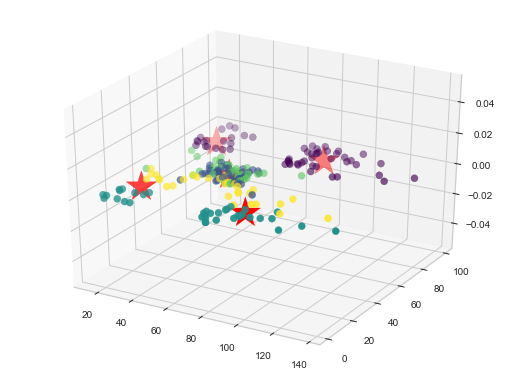

In [34]:
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_new.iloc[:,0],df_new.iloc[:,1],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centroids[:,0],centroids[:,1],c="red",marker="*",s = 1000);

### Hierarchical Clustering

In [35]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [36]:
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import linkage

In [37]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#### *i. Determine optimal number of clusters using Dendogram*

In [38]:
hc_complete = linkage(df2, "complete")
hc_ward = linkage(df2,"ward")

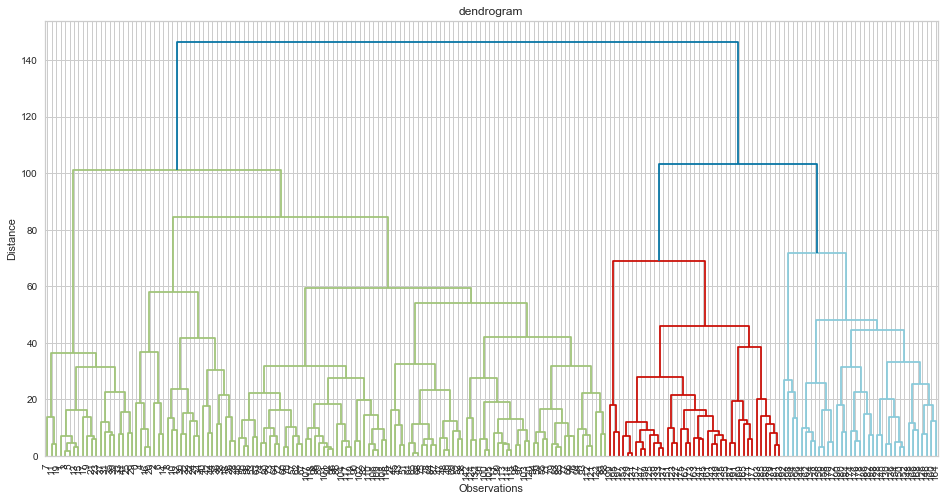

In [45]:
plt.figure(figsize = (16,8))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)
plt.rcParams["axes.grid"] = False;

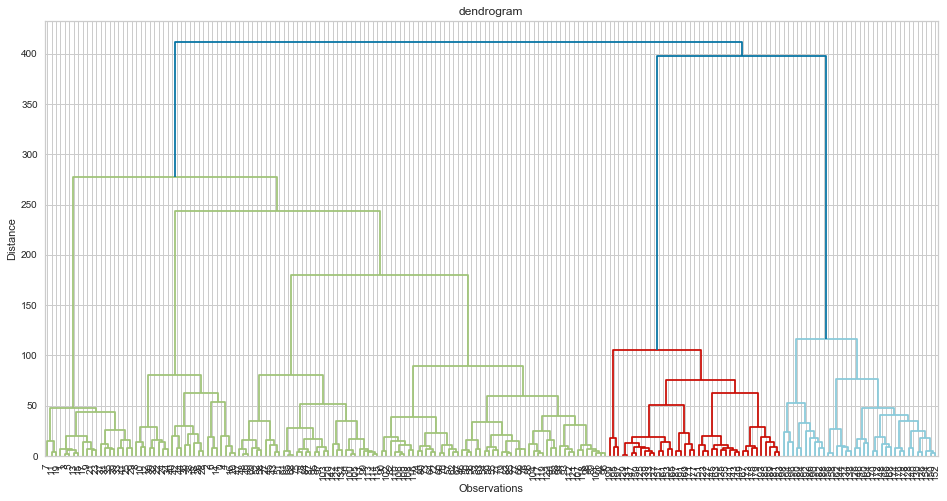

In [44]:
plt.figure(figsize = (16,8))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [41]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
cluster.fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

#### iii. *Visualizing and Labeling All the Clusters* 

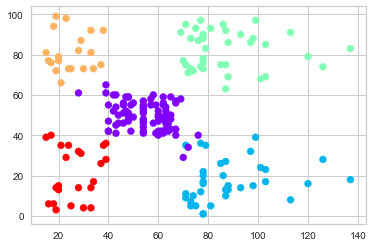

In [42]:
plt.scatter(df2.iloc[:,2],df2.iloc[:,3],c = cluster.labels_, cmap = "rainbow")

<h2 id="conclusion">5. Conclusion</h2>

After developing a solution for this problem, we have come to the following conclusions:

* KMeans Clustering is a powerful technique in order to achieve a decent customer segmentation.
* Customer segmentation is a good way to understand the behaviour of different customers and plan a good marketing strategy accordingly.
* There isn't much difference between the spending score of women and men, which leads us to think that our behaviour when it comes to shopping is pretty similar.
* Observing the clustering graphic, it can be clearly observed that the ones who spend more money in malls are young people.


For other similar useful notebooks on other machine learnings model, please see:

https://github.com/E-Bilgin/Machine-Learning